In [26]:
import pandas as pd
import numpy as np

In [27]:
train_df = pd.read_csv('training.csv')

In [28]:
train_df[['txkey','chid','cano','contp','etymd','mchno','acqic','mcc','ecfg','insfg','bnsfg',\
          'stocn','scity','stscd','ovrlt','flbmk','hcefg','csmcu','flg_3dsmk','label']] = \
    train_df[['txkey','chid','cano','contp','etymd','mchno','acqic','mcc','ecfg','insfg','bnsfg','stocn',\
              'scity','stscd','ovrlt','flbmk','hcefg','csmcu','flg_3dsmk','label']].astype('category')

train_df[train_df.select_dtypes(include='int64').columns] = \
    train_df[train_df.select_dtypes(include='int64').columns].astype('int32')

train_df[train_df.select_dtypes(include='float64').columns] = \
    train_df[train_df.select_dtypes(include='float64').columns].astype('float32')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688526 entries, 0 to 8688525
Data columns (total 26 columns):
 #   Column     Dtype   
---  ------     -----   
 0   txkey      category
 1   locdt      int32   
 2   loctm      int32   
 3   chid       category
 4   cano       category
 5   contp      category
 6   etymd      category
 7   mchno      category
 8   acqic      category
 9   mcc        category
 10  conam      float32 
 11  ecfg       category
 12  insfg      category
 13  iterm      float32 
 14  bnsfg      category
 15  flam1      int32   
 16  stocn      category
 17  scity      category
 18  stscd      category
 19  ovrlt      category
 20  flbmk      category
 21  hcefg      category
 22  csmcu      category
 23  csmam      int32   
 24  flg_3dsmk  category
 25  label      category
dtypes: category(20), float32(2), int32(4)
memory usage: 859.8 MB


In [61]:
# Check for missing values
print(train_df.isnull().sum())

txkey              0
locdt              0
loctm              0
chid               0
cano               0
contp              0
etymd         203455
mchno              0
acqic              0
mcc             4550
conam              0
ecfg               0
insfg              0
iterm              0
bnsfg              0
flam1              0
stocn            600
scity         266066
stscd        8665195
ovrlt              0
flbmk              0
hcefg         286656
csmcu         498657
csmam              0
flg_3dsmk          0
label              0
dtype: int64


  stscd        0      1
0   0.0      746     53
1   1.0    11959  10426
2   2.0      132      0
3   3.0        2      0
4   4.0       13      0
5    NA  8643645  21550


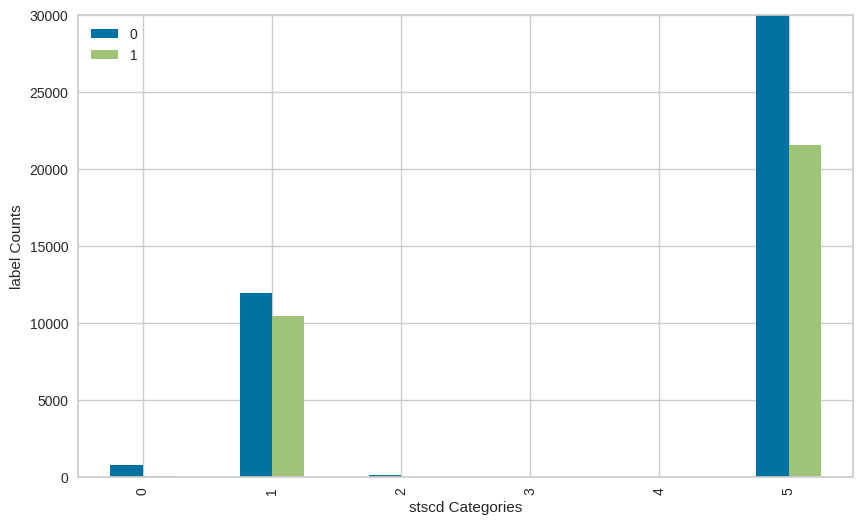

In [62]:
import matplotlib.pyplot as plt
## check stscd data distribution
df = train_df.copy()
df['stscd']=df['stscd'].cat.add_categories("NA").fillna("NA")
stscd_table = df[['label','stscd']].pivot_table(index='stscd', columns='label', aggfunc=len, fill_value=0)
stscd_table = stscd_table.reset_index().rename_axis(None, axis=1).rename_axis(None, axis=0)
print(stscd_table)
stscd_table.plot(kind='bar', stacked=False, figsize=(10, 6)).set_ylim(0, 30000) 
plt.xlabel('stscd Categories')
plt.ylabel('label Counts')
plt.show()

In [29]:
# Binary indicator for missing values
train_df['stscd_missing'] = train_df['stscd'].isnull().astype('int32')
train_df['stscd_missing'].value_counts()

1    8665195
0      23331
Name: stscd_missing, dtype: int64

In [30]:
# 指定要填充的欄位
columns_to_fill = ['etymd', 'mcc', 'stocn', 'scity', 'stscd', 'hcefg', 'csmcu']

# 將 "unknown" 添加到類別中，如果已經存在，則忽略
for column in columns_to_fill:
    train_df[column] = train_df[column].cat.add_categories('-1').fillna('-1')

# Check for missing values
print(train_df.isnull().sum())

txkey            0
locdt            0
loctm            0
chid             0
cano             0
contp            0
etymd            0
mchno            0
acqic            0
mcc              0
conam            0
ecfg             0
insfg            0
iterm            0
bnsfg            0
flam1            0
stocn            0
scity            0
stscd            0
ovrlt            0
flbmk            0
hcefg            0
csmcu            0
csmam            0
flg_3dsmk        0
label            0
stscd_missing    0
dtype: int64


In [31]:
# txkey全部都是唯一資料，刪除不用
train_df.drop('txkey', axis=1, inplace=True)

In [32]:
# label轉成數值，不轉會出現error
train_df['label'] = train_df['label'].astype('int32')

In [67]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [68]:
categorical_feature = [col for col in train_df.columns if train_df[col].dtype == 'category' and col != 'label']
print(categorical_feature)
print('Number of categorical feature:', len(categorical_feature))

['chid', 'cano', 'contp', 'etymd', 'mchno', 'acqic', 'mcc', 'ecfg', 'insfg', 'bnsfg', 'stocn', 'scity', 'stscd', 'ovrlt', 'flbmk', 'hcefg', 'csmcu', 'flg_3dsmk']
Number of categorical feature: 18


In [19]:
# init setup on exp
exp.setup(train_df, target='label',
          fix_imbalance=True, fix_imbalance_method='RandomOverSampler',
          n_jobs=16,
          fold=5,
          log_experiment=True, experiment_name='00_Exp',
          session_id=6969)

,Description,Value
0,Session id,6969
1,Target,label
2,Target type,Binary
3,Original data shape,"(8688526, 26)"
4,Transformed data shape,"(14725654, 58)"
5,Transformed train set shape,"(12119096, 58)"
6,Transformed test set shape,"(2606558, 58)"
7,Ordinal features,6
8,Numeric features,7
9,Categorical features,18


In [19]:
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [20]:
# compare selected models
include_models = ['rf', 'lightgbm'] 
best = exp.compare_models(include=include_models, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9987,0.8948,0.6878,0.9620,0.8021,0.8015,0.8129,174.9520
lightgbm,Light Gradient Boosting Machine,0.9986,0.9465,0.7303,0.8832,0.7980,0.7974,0.8017,136.3740


In [21]:
exp.save_model(best, '00_Exp_model_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['locdt', 'loctm', 'conam', 'iterm',
                                              'flam1', 'csmam',
                                              'stscd_missing'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer...
                  RandomForestClassifie

In [20]:
best = exp.load_model('00_Exp_model_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [22]:
best

Pipeline(memory=FastMemory(location=/dev/shm/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['locdt', 'loctm', 'conam', 'iterm',
                                             'flam1', 'csmam',
                                             'stscd_missing'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('cate...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=30,
                                        oob_score=False, random_state=6969,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [23]:
tune_best = exp.tune_model(best, optimize='F1',early_stopping=True)
# 250G RAM overload

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:35:46
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Fitting 5 folds for each of 10 candidates, totalling 50 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
tune_best

In [ ]:
exp.save_model(tune_best, '00_tuned_model_pipeline')

###lighGBM

In [69]:
# init setup on exp
exp.setup(train_df, target='label',
          fix_imbalance=True, fix_imbalance_method='RandomOverSampler',
          n_jobs=8,
          fold=5,
          log_experiment=True, experiment_name='00_Exp_lighGBM',
          session_id=6969)

,Description,Value
0,Session id,6969
1,Target,label
2,Target type,Binary
3,Original data shape,"(8688526, 26)"
4,Transformed data shape,"(14725654, 58)"
5,Transformed train set shape,"(12119096, 58)"
6,Transformed test set shape,"(2606558, 58)"
7,Ordinal features,6
8,Numeric features,7
9,Categorical features,18


In [70]:
LightGBM = exp.compare_models(include=['lightgbm'], sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9986,0.9488,0.7306,0.8837,0.7983,0.7976,0.8020,40.3940


In [71]:
exp.save_model(LightGBM, '00_Exp_lightgbm_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['locdt', 'loctm', 'conam', 'iterm',
                                              'flam1', 'csmam',
                                              'stscd_missing'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer...
                  LGBMClassifier(boosti

In [72]:
tune_lightgbm = exp.tune_model(LightGBM, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9986,0.9935,0.7076,0.9024,0.7932,0.7926,0.7985
1,0.9987,0.9947,0.7081,0.9137,0.7978,0.7972,0.8037
2,0.9986,0.9936,0.6949,0.9019,0.7850,0.7843,0.7910
3,0.9987,0.9941,0.7107,0.9166,0.8007,0.8000,0.8065
4,0.9991,0.9975,0.8483,0.9144,0.8801,0.8797,0.8803
Mean,0.9988,0.9947,0.7339,0.9098,0.8114,0.8108,0.8160
Std,0.0002,0.0015,0.0575,0.0063,0.0348,0.0349,0.0326


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Info] Number of positive: 4847638, number of negative: 4847638
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.988719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And 

In [83]:
exp.save_model(tune_lightgbm, '00_tune_lightgbm_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['locdt', 'loctm', 'conam', 'iterm',
                                              'flam1', 'csmam',
                                              'stscd_missing'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer...
                                 boosti

## Prediction of public dataset

In [17]:
public_df = pd.read_csv('public_processed.csv')

In [18]:
public_df[['txkey','chid','cano','contp','etymd','mchno','acqic','mcc','ecfg','insfg','bnsfg',\
          'stocn','scity','stscd','ovrlt','flbmk','hcefg','csmcu','flg_3dsmk']] = \
    public_df[['txkey','chid','cano','contp','etymd','mchno','acqic','mcc','ecfg','insfg','bnsfg','stocn',\
              'scity','stscd','ovrlt','flbmk','hcefg','csmcu','flg_3dsmk']].astype('category')

public_df[public_df.select_dtypes(include='int64').columns] = \
    public_df[public_df.select_dtypes(include='int64').columns].astype('int32')

public_df[public_df.select_dtypes(include='float64').columns] = \
    public_df[public_df.select_dtypes(include='float64').columns].astype('float32')

In [19]:
# Binary indicator for missing values
public_df['stscd_missing'] = public_df['stscd'].isnull().astype(int)
public_df['stscd_missing'].value_counts()
# 指定要填充的欄位
columns_to_fill = ['etymd', 'mcc', 'stocn', 'scity', 'stscd', 'hcefg', 'csmcu']

# 將 "unknown" 添加到類別中，如果已經存在，則忽略
for column in columns_to_fill:
    public_df[column] = public_df[column].cat.add_categories('-1').fillna('-1')

ID_public = public_df.txkey
public_df.drop('txkey', axis=1, inplace=True)

In [33]:
train_df.info()
public_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8688526 entries, 0 to 8688525
Data columns (total 26 columns):
 #   Column         Dtype   
---  ------         -----   
 0   locdt          int32   
 1   loctm          int32   
 2   chid           category
 3   cano           category
 4   contp          category
 5   etymd          category
 6   mchno          category
 7   acqic          category
 8   mcc            category
 9   conam          float32 
 10  ecfg           category
 11  insfg          category
 12  iterm          float32 
 13  bnsfg          category
 14  flam1          int32   
 15  stocn          category
 16  scity          category
 17  stscd          category
 18  ovrlt          category
 19  flbmk          category
 20  hcefg          category
 21  csmcu          category
 22  csmam          int32   
 23  flg_3dsmk      category
 24  label          int32   
 25  stscd_missing  int32   
dtypes: category(18), float32(2), int32(6)
memory usage: 560.4 MB
<class 'p

In [34]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
tune_lightgbm = exp.load_model('00_tune_lightgbm_pipeline')
tune_lightgbm

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['locdt', 'loctm', 'conam', 'iterm',
                                             'flam1', 'csmam',
                                             'stscd_missing'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['chid', 'cano', 'contp', 'etymd',
                                             'mchno', 'acqic', 'mcc', 'ecfg',
                                             'insfg', 'bnsfg', 'stocn', 'scity',
                                             'stscd', 'ovrlt', 'fl...
                                    transformer=TargetEncoder(handle_missing='return_nan'))),
                ('balance',
                 TransformerWrapper(transformer=FixImbalancer(estimator=RandomOverSampler(random_state=6970)))),
                ('trained_model',
                 LGBMClassifier(bagging_fraction=1.0, bagging_freq=4,
                                feature_fraction=0.6, min_child_samples=36,
                                min_split_gain=0.2, n_estimators=80, n_jobs=8,
                                num_leaves=90, random_state=6969, reg_alpha=0.3,
                                reg_lambda=1))])

In [35]:
tune_lightgbm00_predict = exp.predict_model(tune_lightgbm, data=public_df)

AttributeError: 'TransformerWrapper' object has no attribute 'target_name_'

## RF

In [84]:
# init setup on exp
exp.setup(train_df, target='label',
          fix_imbalance=True, fix_imbalance_method='RandomOverSampler',
          n_jobs=16,
          fold=5,
          log_experiment=True, experiment_name='00_Exp_RF',
          session_id=6970)

,Description,Value
0,Session id,6970
1,Target,label
2,Target type,Binary
3,Original data shape,"(8688526, 26)"
4,Transformed data shape,"(14725654, 58)"
5,Transformed train set shape,"(12119096, 58)"
6,Transformed test set shape,"(2606558, 58)"
7,Ordinal features,6
8,Numeric features,7
9,Categorical features,18


2023/11/20 16:16:53 INFO mlflow.tracking.fluent: Experiment with name '00_Exp_RF' does not exist. Creating a new experiment.


In [85]:
RF = exp.compare_models(include=['rf'], sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9987,0.8779,0.6859,0.9621,0.8008,0.8002,0.8118,171.3260


In [ ]:
tune_RF = exp.tune_model(RF, optimize='F1')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:37:31
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
